In [1]:
import sys

import torch

sys.path.append("..")

In [2]:
from data.dataloader import LowLightDataModule
from model.blocks.separation import SeparationBlock
from utils.utils import show_batch

In [3]:
data_module = LowLightDataModule(
    train_dir="../data/1_train",
    valid_dir="../data/2_valid",
    bench_dir="../data/3_bench",
    infer_dir="../data/4_infer",
    image_size=256,
    batch_size=1,
    num_workers=4,
)

data_module.setup(stage="fit")

In [4]:
train_dataloader = data_module.train_dataloader()

torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


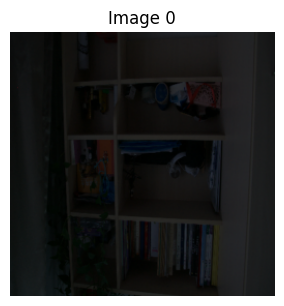

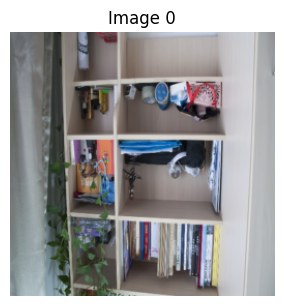

In [5]:
train_low, train_high = next(iter(train_dataloader))

In [6]:
separate = SeparationBlock(kernel_size=15, sigma=5)

In [7]:
train_low = train_low.cuda()
separate = separate.cuda()

In [8]:
x1, x2, x3 = train_low[:, 0:1, :, :], train_low[:, 1:2, :, :], train_low[:, 2:3, :, :]
x1_il, x1_re = separate(x1)
x2_il, x2_re = separate(x2)
x3_il, x3_re = separate(x3)

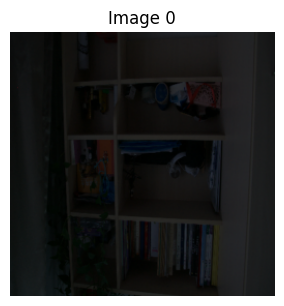

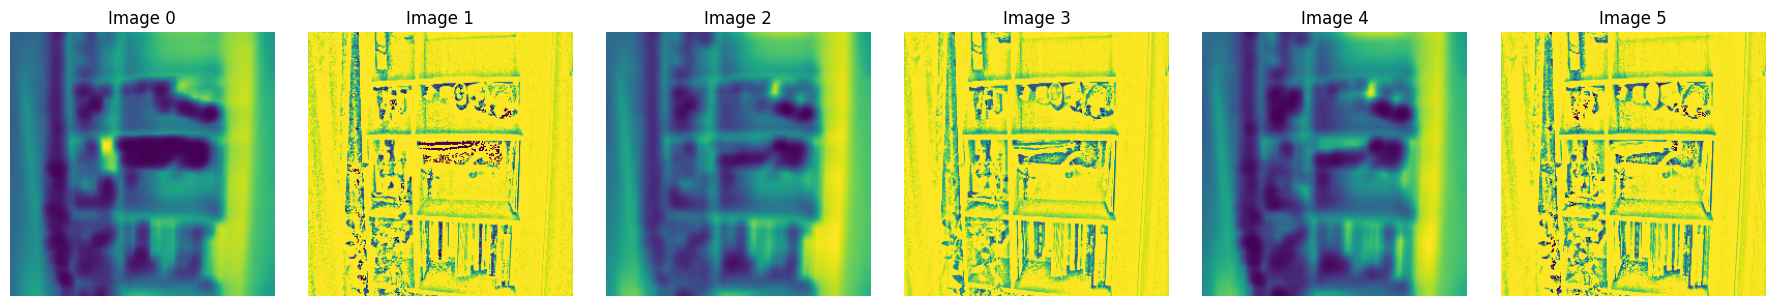

In [9]:
show_batch(images=train_low)
show_batch(images=torch.cat(tensors=[x1_il, x1_re, x2_il, x2_re, x3_il, x3_re], dim=0))